In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

def visualize_regions(model, MAX, nGrid):
    a1 = np.linspace(-MAX, MAX, nGrid)
    a2 = np.linspace(-MAX, MAX, nGrid)

    A1, A2 = np.meshgrid(a1, a2)
    A1 = A1.flatten()
    A2 = A2.flatten()
    A = np.vstack((A1, A2)).T

    # Predict B
    B = model.predict(A)
    B = B.reshape(nGrid, nGrid)
    B = np.flipud(B)

    # Compute entropy for S
    prob_2D = model.predict_proba(A)
    S = np.array([entropy(p, 2) for p in prob_2D])
    S = S.reshape(nGrid, nGrid)
    S = np.flipud(S)

    return B, S
# end
    
def GenerateData(n_pts1,n_pts2,center_sep,std):
    
    cov = std**2*np.eye(2)
    
    x1 = np.random.multivariate_normal(mean=[-center_sep/2,0],
                                       cov=cov,
                                       size=n_pts1)
    y1 = np.zeros(n_pts1)
    
    x2 = np.random.multivariate_normal(mean=[center_sep/2,0],
                                       cov=cov,
                                       size=n_pts2)
    y2 = np.ones(n_pts2)
    
    X = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0).astype(int)
    
    return X, y
# end

# Create data

24298794


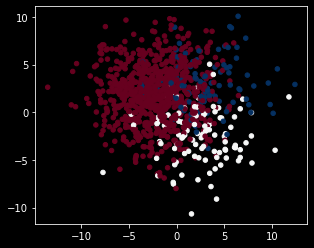

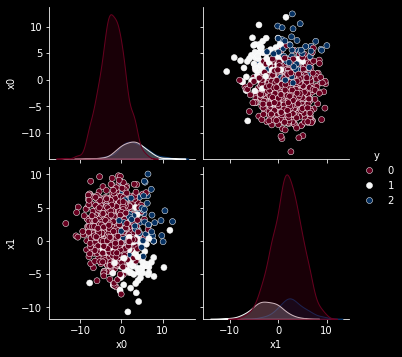

In [17]:
from sklearn.datasets import make_blobs

rng = np.random.randint(0,100000000,1)[0]
print(rng)

# Define the number of samples per class
n_samples_per_class = [800, 100, 100]  # Unequal number of samples per class
centers = [[-2, 2], [2, -2], [3, 3]]  # Define explicit cluster centers

# Generate blobs with specified sample sizes
X, y = make_blobs(
    n_samples=n_samples_per_class,  # Different sample sizes per class
    centers=centers,  # Explicit center coordinates
    n_features=2,  # 2D data
    cluster_std=[3, 3, 3],  # Different spread for each class
    random_state=88028025
)

MAX = np.max(np.abs(X))

cmap = 'RdBu'

plt_scale = 3
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=cmap)
#plt.xlim(-plt_scale,plt_scale)
#plt.ylim(-plt_scale,plt_scale)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

# Modeling w/o balancing

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    800
1    100
2    100
Name: count, dtype: int64

Training data:
0    640
1     80
2     80
Name: count, dtype: int64

Testing data:
0    160
2     20
1     20
Name: count, dtype: int64


{0: 0.9259325560452055, 1: 0.05779301860203146, 2: 0.016274425352763182}
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       160
           1       1.00      0.05      0.10        20
           2       1.00      0.05      0.10        20

    accuracy                           0.81       200
   macro avg       0.94      0.37      0.36       200
weighted avg       0.85      0.81      0.73       200



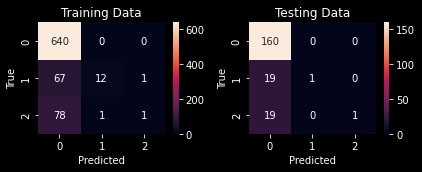

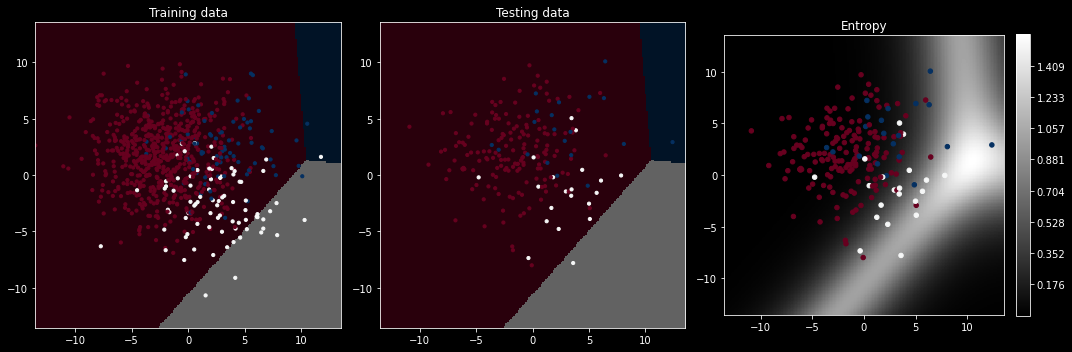

{0: 0.08581823359776981, 1: 0.11640265703138257, 2: 0.7977791093708476}
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       160
           1       0.67      0.30      0.41        20
           2       0.22      0.85      0.35        20

    accuracy                           0.66       200
   macro avg       0.61      0.61      0.52       200
weighted avg       0.85      0.66      0.71       200



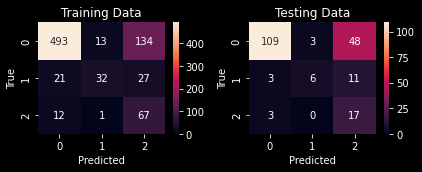

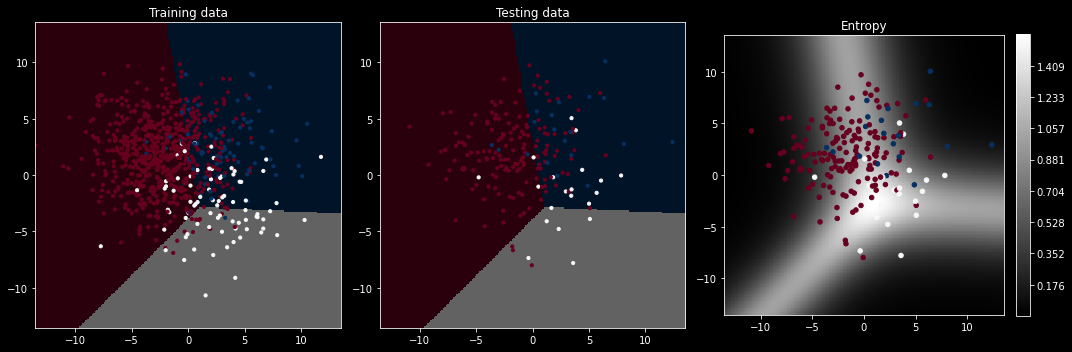

{0: 0.47738849334139194, 1: 0.10453432130869027, 2: 0.4180771853499179}
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       160
           1       0.50      0.10      0.17        20
           2       0.46      0.30      0.36        20

    accuracy                           0.81       200
   macro avg       0.60      0.46      0.48       200
weighted avg       0.77      0.81      0.78       200



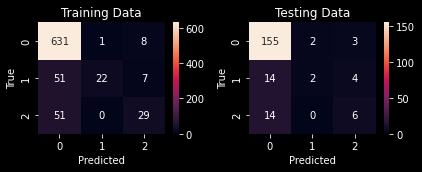

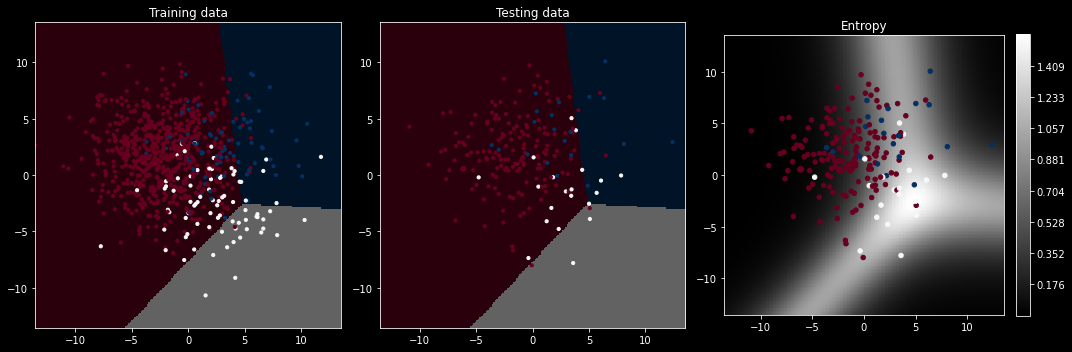

{0: 0.03367717546129627, 1: 0.7476507207676095, 2: 0.21867210377109414}
              precision    recall  f1-score   support

           0       0.95      0.61      0.75       160
           1       0.29      0.80      0.43        20
           2       0.33      0.70      0.45        20

    accuracy                           0.64       200
   macro avg       0.53      0.70      0.54       200
weighted avg       0.82      0.64      0.68       200



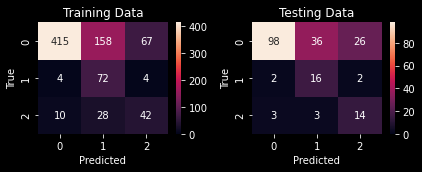

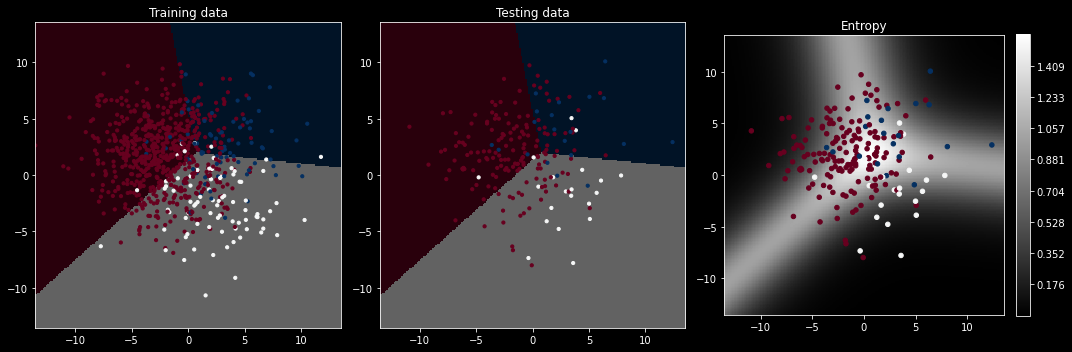

{0: 0.10195974275044951, 1: 0.4160396393681994, 2: 0.4820006178813512}
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       160
           1       0.46      0.60      0.52        20
           2       0.29      0.60      0.39        20

    accuracy                           0.73       200
   macro avg       0.56      0.66      0.58       200
weighted avg       0.82      0.73      0.76       200



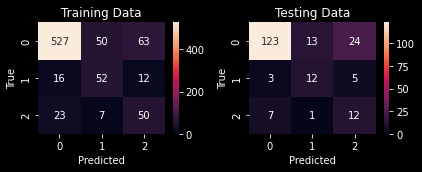

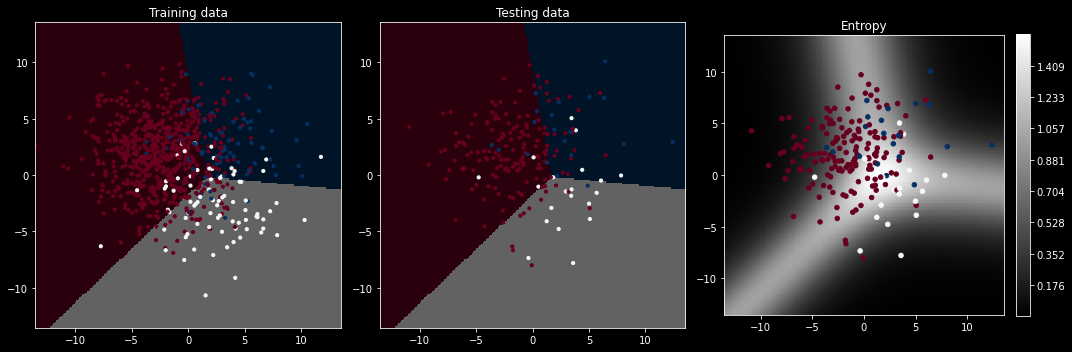

{0: 0.5537009949109827, 1: 0.2431717238323153, 2: 0.2031272812567021}
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       160
           1       0.78      0.35      0.48        20
           2       0.57      0.20      0.30        20

    accuracy                           0.83       200
   macro avg       0.73      0.51      0.56       200
weighted avg       0.81      0.83      0.80       200



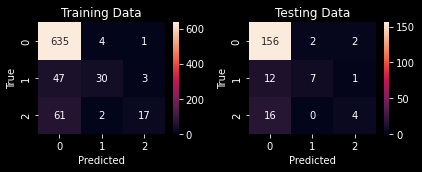

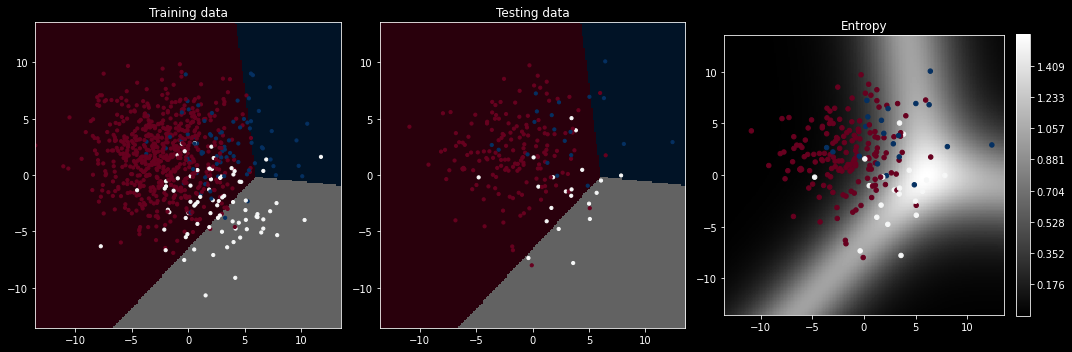

{0: 0.2616896042562348, 1: 0.6071905355311217, 2: 0.13111986021264369}
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       160
           1       0.64      0.70      0.67        20
           2       0.83      0.25      0.38        20

    accuracy                           0.85       200
   macro avg       0.78      0.63      0.66       200
weighted avg       0.85      0.85      0.84       200



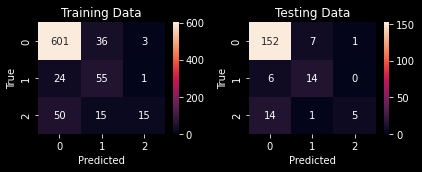

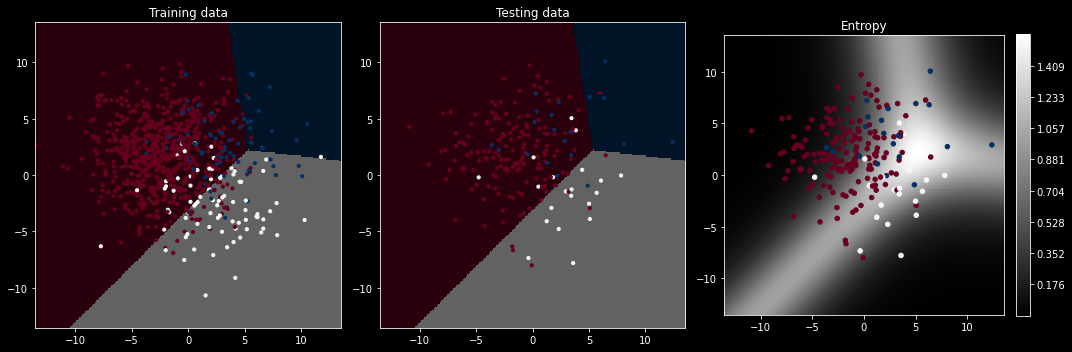

{0: 0.36223866947375155, 1: 0.1173657453651126, 2: 0.5203955851611359}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       160
           1       0.67      0.20      0.31        20
           2       0.36      0.40      0.38        20

    accuracy                           0.81       200
   macro avg       0.64      0.51      0.53       200
weighted avg       0.81      0.81      0.80       200



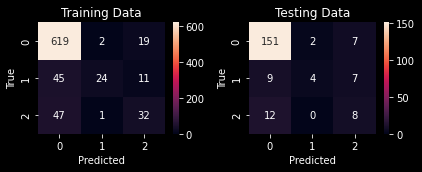

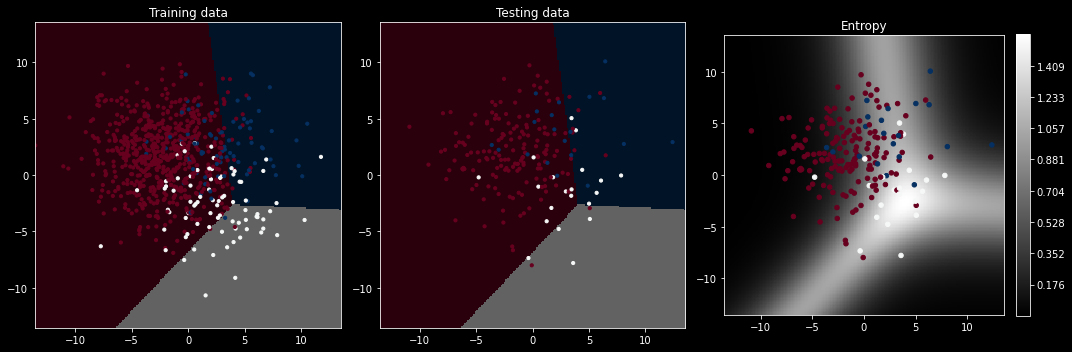

{0: 0.6955743342002757, 1: 0.20418088614225588, 2: 0.10024477965746849}
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       160
           1       0.71      0.25      0.37        20
           2       1.00      0.15      0.26        20

    accuracy                           0.83       200
   macro avg       0.85      0.46      0.51       200
weighted avg       0.84      0.83      0.79       200



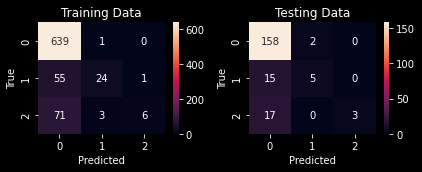

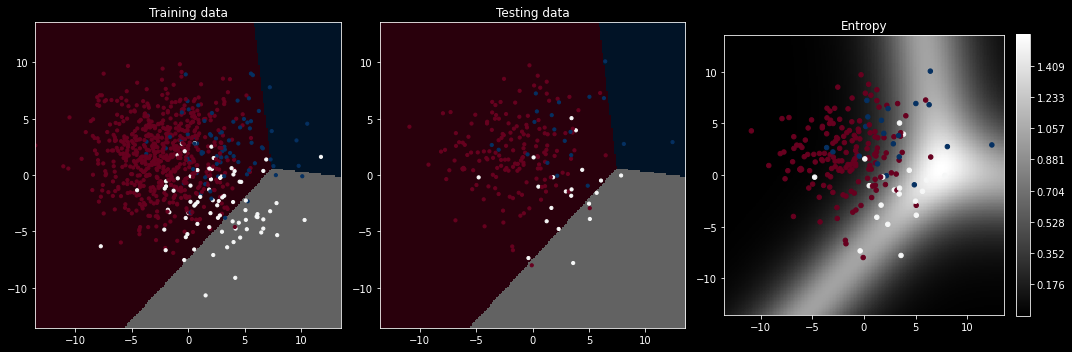

{0: 0.44991887148626375, 1: 0.520600071619582, 2: 0.02948105689415418}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       160
           1       0.60      0.60      0.60        20
           2       0.00      0.00      0.00        20

    accuracy                           0.83       200
   macro avg       0.49      0.52      0.50       200
weighted avg       0.75      0.83      0.79       200



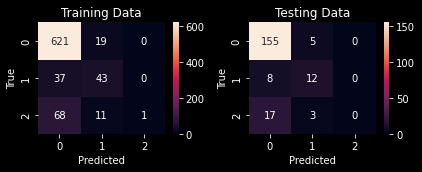

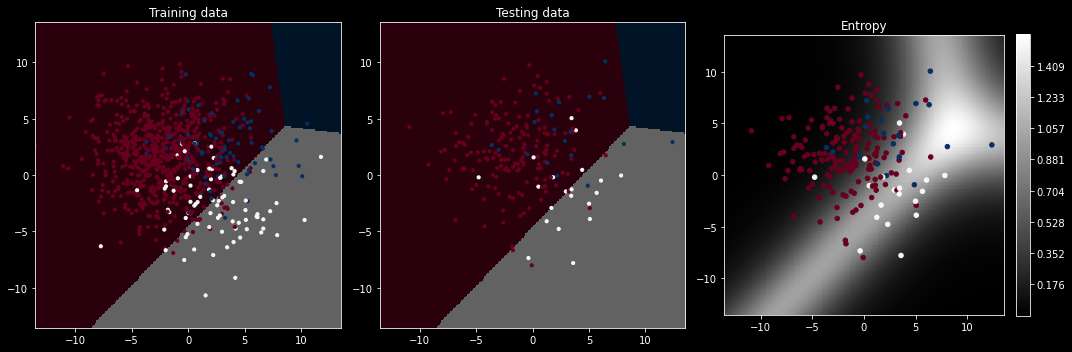

In [21]:
n_weights = 10

for i in range(n_weights):
    class_weight = np.random.dirichlet(np.ones(3))
    class_weight = {i: class_weight[i] for i in range(len(class_weight))}
    print(class_weight)
    
    model = LogisticRegression(class_weight=class_weight)
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train).astype(int)
    y_test_pred = model.predict(X_test).astype(int)
    
    print(classification_report(y_test, y_test_pred))
    
    conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(int)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(int)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    plt.tight_layout()
    plt.show()
    
    B, S = visualize_regions(model, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))
    
    plt.tight_layout()
    plt.show()
# end

# Modleing with Dirichlet-distributed class weights

A dirichlet distribution is a distribution that can generate a probability distribution over n outcomes, i.e., each of the n values generated in each sample are all less than 0 and all sum to 1.

https://en.wikipedia.org/wiki/Dirichlet_distribution

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

dirichlet_samples = [dict(enumerate(weights)) for weights in np.random.dirichlet(alpha=np.ones(3), size=1000)]

# Define StratifiedKFold for balanced class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Define the parameter grid
param_grid = {'class_weight': dirichlet_samples}

# Define the Logistic Regression model
model = LogisticRegression()

# Perform GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'class_weight': {0: 0.16931265616048086,
  1: 0.4243133059534784,
  2: 0.4063740378860408}}

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.60      0.60      0.60        20
           2       0.38      0.45      0.41        20

    accuracy                           0.81       200
   macro avg       0.63      0.65      0.64       200
weighted avg       0.83      0.81      0.82       200



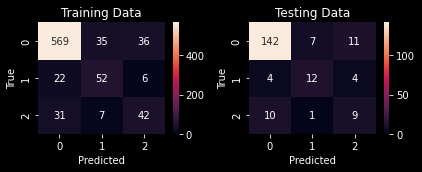

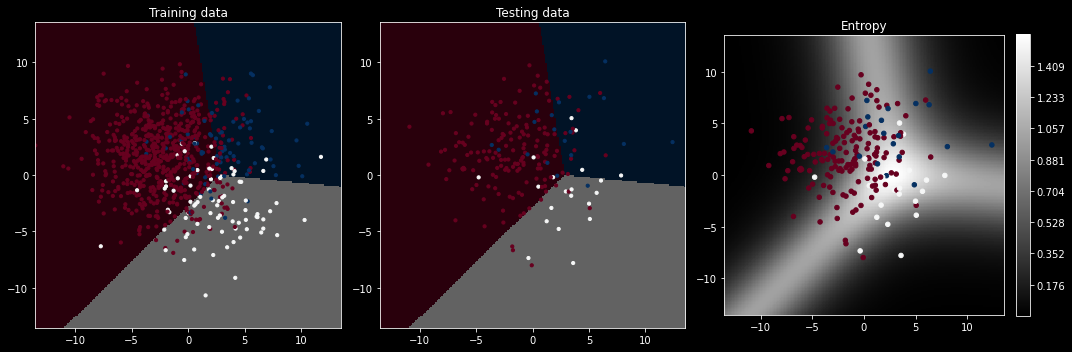

In [31]:
#########################
### CHECK PERFORMANCE ###
#########################
model = grid_search.best_estimator_

y_train_pred = model.predict(X_train).astype(int)
y_test_pred = model.predict(X_test).astype(int)

print(classification_report(y_test, y_test_pred))

conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

plt.tight_layout()
plt.show()

B, S = visualize_regions(model, MAX, 200)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

extent = [-MAX,MAX,-MAX,MAX]

cmap = "RdBu"
axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
axes[0].set_aspect('equal')
axes[0].set_title('Training data');

axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
axes[1].set_aspect('equal')
axes[1].set_title('Testing data');

im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
axes[2].set_aspect('equal')
axes[2].set_title('Entropy')
cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

plt.tight_layout()
plt.show()